In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
import io
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [171]:
path = "/content/drive/MyDrive/ML/ML Assignments/Assignment 1/Heart Disease data.csv"
df = pd.read_csv(path)

In [172]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [173]:
df.shape

(4238, 16)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  HeartDisease     4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [175]:
# How many missing records are there in each column
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [176]:
# Data Preprocessing

# Handling missing values
df.fillna(df.mean(), inplace=True)

In [177]:
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [178]:
# Split the features into dependent and independent

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [179]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,2.0,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1.0,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,3.0,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,3.0,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753


In [180]:
y

,HeartDisease
0,0
1,0
2,0
3,1
4,0
...,...
4233,1
4234,0
4235,0
4236,0


In [181]:
def scale(X):
    new = X - np.mean(X, axis=0)
    return new / np.std(new, axis=0)

In [182]:
X_scaled = scale(X)

In [183]:
X_scaled

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.153192,-1.234951,2.007088,-0.988271,-0.757974,-1.758438e-01,-0.077033,-0.671101,-0.162477,-0.941346,-1.195907,-1.082625,0.286943,0.342744,-0.217517
1,-0.867158,-0.418257,0.020905,-0.988271,-0.757974,-1.758438e-01,-0.077033,-0.671101,-0.162477,0.299595,-0.515187,-0.158988,0.719325,1.590275,-0.261311
2,1.153192,-0.184916,-0.972187,1.011868,0.925835,-1.758438e-01,-0.077033,-0.671101,-0.162477,0.186782,-0.220209,-0.242955,-0.113502,-0.073099,-0.524078
3,-0.867158,1.331800,1.013996,1.011868,1.767740,-1.758438e-01,-0.077033,1.490089,-0.162477,-0.264469,0.800871,1.016549,0.682474,-0.904786,0.921141
4,-0.867158,-0.418257,1.013996,1.011868,1.178407,-1.758438e-01,-0.077033,-0.671101,-0.162477,1.089284,-0.106755,0.092912,-0.663807,0.758588,0.132840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.153192,0.048425,-0.972187,1.011868,-0.673784,-1.758438e-01,-0.077033,1.490089,-0.162477,1.721036,2.116930,0.764648,0.041271,-0.821617,0.176634
4234,1.153192,0.165095,1.013996,1.011868,2.862216,-1.758438e-01,-0.077033,-0.671101,-0.162477,-0.670595,-0.265590,-0.242955,-1.496634,-0.904786,-0.611667
4235,-0.867158,-0.184916,0.020905,1.011868,0.925835,-2.059023e-17,-0.077033,-0.671101,-0.162477,0.254470,-0.061374,-0.914691,-0.934046,0.675419,0.176634
4236,-0.867158,-0.651598,-0.972187,1.011868,0.504883,-1.758438e-01,-0.077033,-0.671101,-0.162477,-0.602907,-0.265590,0.344813,-1.631754,0.841756,0.000000


In [184]:
def train_test_split_(X, y, test_size=0.15, val_size=0.15, random_state=None):
    X = np.asarray(X)
    y = np.asarray(y)

    if len(X) != len(y):
        raise ValueError("Features and labels must have the same length.")

    length = len(X)

    if random_state is not None:
        np.random.seed(random_state)

    # Generate permutation of indices
    indices = np.arange(length)
    np.random.shuffle(indices)

    test_size = int(np.ceil(length * test_size))
    val_size = int(np.ceil(length * val_size))
    train_size = length - test_size - val_size

    test_indices = indices[:test_size]
    val_indices = indices[test_size:test_size + val_size]
    train_indices = indices[test_size + val_size:]

    # Create training, validation, and test sets
    X_train = X[train_indices]
    X_val = X[val_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_val = y[val_indices]
    y_test = y[test_indices]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [185]:
# Split dataset into train (70%), validation (15%), test (15%)

X_train, X_val, X_test, y_train, y_val, y_test = train_test_split_(X_scaled, y, test_size=0.15, val_size=0.15, random_state=42)

In [186]:
X_train.shape

(2966, 15)

In [187]:
class LogisticRegressionBGD:
    def __init__(self, learningRate, numIterations, weight, bias, x_data, y_data, l1_penalty=0.0, regularization=None, reg_lambda=None):
        self.learningRate = learningRate
        self.numIterations = numIterations
        self.w = weight
        self.b = bias
        self.x_data = x_data
        self.y_data = y_data
        self.loss = []
        self.accuracy = []
        self.l1_penalty = l1_penalty
        self.regularization = regularization
        self.reg_lambda = reg_lambda

        # Ensure x_data and y_data are numpy arrays
        if isinstance(self.x_data, pd.DataFrame):
            self.x_data = self.x_data.to_numpy()
        if isinstance(self.y_data, pd.Series):
            self.y_data = self.y_data.to_numpy()

    def sigmoid(self, z):
        z = np.clip(z, -100, 100)  # To avoid overflow
        return 1 / (1 + np.exp(-z))

    def lossFunction(self, y_pred, y_true):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        m = len(y_true)
        cost = -(1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return cost

    def lossFunctionPenalty(self, y_pred, y_true):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        m = len(y_true)
        cost = -(1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        if self.regularization == 'L1':
            cost += self.reg_lambda * np.sum(np.abs(self.w))
        elif self.regularization == 'L2':
            cost += self.reg_lambda * np.sum(np.square(self.w))

        return cost

    def hypothesis(self, w, x, b):
        z = np.dot(x, w) + b
        return z

    def derivative(self, y_pred, x, y):
        m = x.shape[0]
        dw = 1/m * np.dot(x.T, (y_pred - y))
        db = 1/m * np.sum(y_pred - y)

        if self.regularization == 'L1':
            dw += self.reg_lambda * np.sign(self.w)
        elif self.regularization == 'L2':
            dw += self.reg_lambda * 2 * self.w

        return dw, db

    def batchGradientDescent(self, early_stopping=False, patience=5, tol=1e-4):
        best_loss = np.inf
        no_improvement = 0

        for i in range(self.numIterations):
            z = self.hypothesis(self.w, self.x_data, self.b)
            y_pred = self.sigmoid(z)
            dw, db = self.derivative(y_pred, self.x_data, self.y_data)

            self.w -= self.learningRate * dw
            self.b -= self.learningRate * db

            loss = self.lossFunctionPenalty(y_pred, self.y_data)
            accuracy = self.calculate_accuracy(self.x_data, self.y_data)
            self.loss.append(loss)
            self.accuracy.append(accuracy)

            # Early stopping mechanism
            if early_stopping:
                if loss < best_loss - tol:
                    best_loss = loss
                    no_improvement = 0
                    print(f"Improvement detected at iteration {i+1}, best_loss updated to {best_loss:.4f}")
                else:
                    no_improvement += 1
                    print(f"No improvement at iteration {i+1}, patience counter: {no_improvement}/{patience}")

                if no_improvement >= patience:
                    print(f"Early stopping at iteration {i+1} due to no improvement for {patience} iterations.")
                    break

            print(f"Epoch {i+1}/{self.numIterations}, Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

        return (y_pred >= 0.5).astype(int)

    def predict(self, x):
        z = self.hypothesis(self.w, x, self.b)
        y_pred = self.sigmoid(z)
        return y_pred

    def calculate_accuracy(self, x, y):
        y_pred = self.predict(x)
        accuracy = ((y_pred >= 0.5) == y).mean()
        return accuracy

    def stochasticGradientDescent(self, early_stopping=False, patience=5, tol=1e-4):
        best_loss = np.inf
        no_improvement = 0

        for i in range(self.numIterations):
            for j in range(self.x_data.shape[0]):
                x_sample = self.x_data[j, :].reshape(1, -1)
                y_sample = self.y_data[j].reshape(1)

                z = self.hypothesis(self.w, x_sample, self.b)
                y_pred = self.sigmoid(z)

                dw, db = self.derivative(y_pred, x_sample, y_sample)

                self.w -= self.learningRate * dw
                self.b -= self.learningRate * db

            z = self.hypothesis(self.w, self.x_data, self.b)
            y_pred_train = self.sigmoid(z)
            loss = self.lossFunctionPenalty(y_pred_train, self.y_data)
            accuracy = self.calculate_accuracy(self.x_data, self.y_data)
            self.loss.append(loss)
            self.accuracy.append(accuracy)

            print(f"Epoch {i+1}/{self.numIterations}, Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

            # Early stopping mechanism
            if early_stopping:
                if loss < best_loss - tol:
                    best_loss = loss
                    no_improvement = 0
                    print(f"Improvement detected at iteration {i+1}, best_loss updated to {best_loss:.4f}")
                else:
                    no_improvement += 1
                    print(f"No improvement at iteration {i+1}, patience counter: {no_improvement}/{patience}")

                if no_improvement >= patience:
                    print(f"Early stopping at iteration {i+1} due to no improvement for {patience} iterations.")
                    break

        return (y_pred_train >= 0.5).astype(int)

    def miniBatchGradientDescent(self, batch_size):
        for i in range(self.numIterations):
            indices = np.arange(self.x_data.shape[0])
            np.random.shuffle(indices)
            for start_idx in range(0, self.x_data.shape[0], batch_size):
                end_idx = min(start_idx + batch_size, self.x_data.shape[0])
                batch_indices = indices[start_idx:end_idx]

                x_batch = self.x_data[batch_indices]
                y_batch = self.y_data[batch_indices]

                z = self.hypothesis(self.w, x_batch, self.b)
                y_pred = self.sigmoid(z)

                dw, db = self.derivative(y_pred, x_batch, y_batch)

                self.w -= self.learningRate * dw
                self.b -= self.learningRate * db

            z = self.hypothesis(self.w, self.x_data, self.b)
            y_pred_train = self.sigmoid(z)
            loss = self.lossFunctionPenalty(y_pred_train, self.y_data)
            accuracy = self.calculate_accuracy(self.x_data, self.y_data)
            self.loss.append(loss)
            self.accuracy.append(accuracy)
            print(f"Epoch {i+1}/{self.numIterations}, Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

        print("\n")
        return self.loss, self.accuracy, y_pred_train

    def trainData(self, method='batch', batch_size=None, early_stopping=False, patience=5, tol=1e-4):
        if method == 'batch':
            y_pred = self.batchGradientDescent(early_stopping, patience, tol)
            return self.loss, self.accuracy, y_pred

        elif method == 'sgd':
            y_pred = self.stochasticGradientDescent(early_stopping, patience, tol)
            return self.loss, self.accuracy, y_pred

        elif method == 'mini_batch':
            if batch_size is None:
                raise ValueError("Batch size must be provided for mini-batch gradient descent")
            return self.miniBatchGradientDescent(batch_size)

    def confusion_matrix(self, y_pred):
        y_pred = np.array(y_pred).flatten()
        y_train = self.y_data.flatten()

        tp = tn = fp = fn = 0

        matrix = np.zeros((2, 2))

        for i in range(len(y_pred)):
            if y_pred[i] == 1 and y_train[i] == 1:
                tp += 1
                matrix[0, 0] = tp
            elif y_pred[i] == 1 and y_train[i] == 0:
                fp += 1
                matrix[0, 1] = fp
            elif y_pred[i] == 0 and y_train[i] == 1:
                fn += 1
                matrix[1, 0] = fn
            elif y_pred[i] == 0 and y_train[i] == 0:
                tn += 1
                matrix[1, 1] = tn

        return matrix, tp, tn, fp, fn

    def metrics(self, tp, tn, fp, fn):
      accuracy = (tp + tn) / (tp + tn + fp + fn)

      precision =  tp / (tp + fp) if (tp + fp) > 0 else 0

      recall = tp / (tp + fn) if (tp + fn) > 0 else 0

      f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

      return accuracy, precision, recall, f1_score

    def kfold_Indices(self, k):
      # Number of samples in the validation set
      num_samples = len(self.x_data)

      # Shuffle the indices
      indices = np.arange(num_samples)
      np.random.shuffle(indices)

      # size of each fold
      fold_size = num_samples // k

      folds = []
      for i in range(k):
          # validation indices for this fold
          val_indices = indices[i * fold_size:(i + 1) * fold_size]
          folds.append(val_indices)

      return folds



# **PART A**

In [188]:
num_features = X_train.shape[1]
weights = np.zeros(num_features)
bias = 0
numIterations=100

model = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weights, bias=bias, x_data=X_train, y_data=y_train)

# Train the model
loss_train, acc_train, y_pred_train = model.trainData(method='batch')

Epoch 1/100, Loss: 0.6931, Accuracy: 81.69%
Epoch 2/100, Loss: 0.6917, Accuracy: 81.73%
Epoch 3/100, Loss: 0.6903, Accuracy: 81.76%
Epoch 4/100, Loss: 0.6888, Accuracy: 81.76%
Epoch 5/100, Loss: 0.6874, Accuracy: 81.76%
Epoch 6/100, Loss: 0.6860, Accuracy: 81.86%
Epoch 7/100, Loss: 0.6846, Accuracy: 81.93%
Epoch 8/100, Loss: 0.6832, Accuracy: 82.00%
Epoch 9/100, Loss: 0.6818, Accuracy: 82.06%
Epoch 10/100, Loss: 0.6805, Accuracy: 82.13%
Epoch 11/100, Loss: 0.6791, Accuracy: 82.20%
Epoch 12/100, Loss: 0.6777, Accuracy: 82.30%
Epoch 13/100, Loss: 0.6764, Accuracy: 82.30%
Epoch 14/100, Loss: 0.6750, Accuracy: 82.37%
Epoch 15/100, Loss: 0.6737, Accuracy: 82.37%
Epoch 16/100, Loss: 0.6724, Accuracy: 82.30%
Epoch 17/100, Loss: 0.6711, Accuracy: 82.33%
Epoch 18/100, Loss: 0.6698, Accuracy: 82.40%
Epoch 19/100, Loss: 0.6684, Accuracy: 82.40%
Epoch 20/100, Loss: 0.6672, Accuracy: 82.40%
Epoch 21/100, Loss: 0.6659, Accuracy: 82.40%
Epoch 22/100, Loss: 0.6646, Accuracy: 82.40%
Epoch 23/100, Loss:

In [189]:
y_pred_train

array([0, 1, 0, ..., 0, 0, 0])

In [190]:
model = LogisticRegressionBGD(learningRate=0.01, numIterations=100, weight=weights, bias=bias, x_data=X_val, y_data=y_val)

# Train the model
loss_val, acc_val, y_pred_val = model.trainData(method='batch')

Epoch 1/100, Loss: 0.6739, Accuracy: 62.89%
Epoch 2/100, Loss: 0.6724, Accuracy: 63.21%
Epoch 3/100, Loss: 0.6709, Accuracy: 63.84%
Epoch 4/100, Loss: 0.6695, Accuracy: 64.78%
Epoch 5/100, Loss: 0.6680, Accuracy: 64.94%
Epoch 6/100, Loss: 0.6666, Accuracy: 65.41%
Epoch 7/100, Loss: 0.6652, Accuracy: 66.04%
Epoch 8/100, Loss: 0.6638, Accuracy: 66.35%
Epoch 9/100, Loss: 0.6624, Accuracy: 66.98%
Epoch 10/100, Loss: 0.6610, Accuracy: 66.51%
Epoch 11/100, Loss: 0.6596, Accuracy: 66.51%
Epoch 12/100, Loss: 0.6582, Accuracy: 66.98%
Epoch 13/100, Loss: 0.6568, Accuracy: 67.77%
Epoch 14/100, Loss: 0.6555, Accuracy: 68.55%
Epoch 15/100, Loss: 0.6541, Accuracy: 68.71%
Epoch 16/100, Loss: 0.6528, Accuracy: 68.71%
Epoch 17/100, Loss: 0.6514, Accuracy: 69.34%
Epoch 18/100, Loss: 0.6501, Accuracy: 69.65%
Epoch 19/100, Loss: 0.6488, Accuracy: 70.13%
Epoch 20/100, Loss: 0.6475, Accuracy: 70.13%
Epoch 21/100, Loss: 0.6462, Accuracy: 70.44%
Epoch 22/100, Loss: 0.6449, Accuracy: 70.28%
Epoch 23/100, Loss:

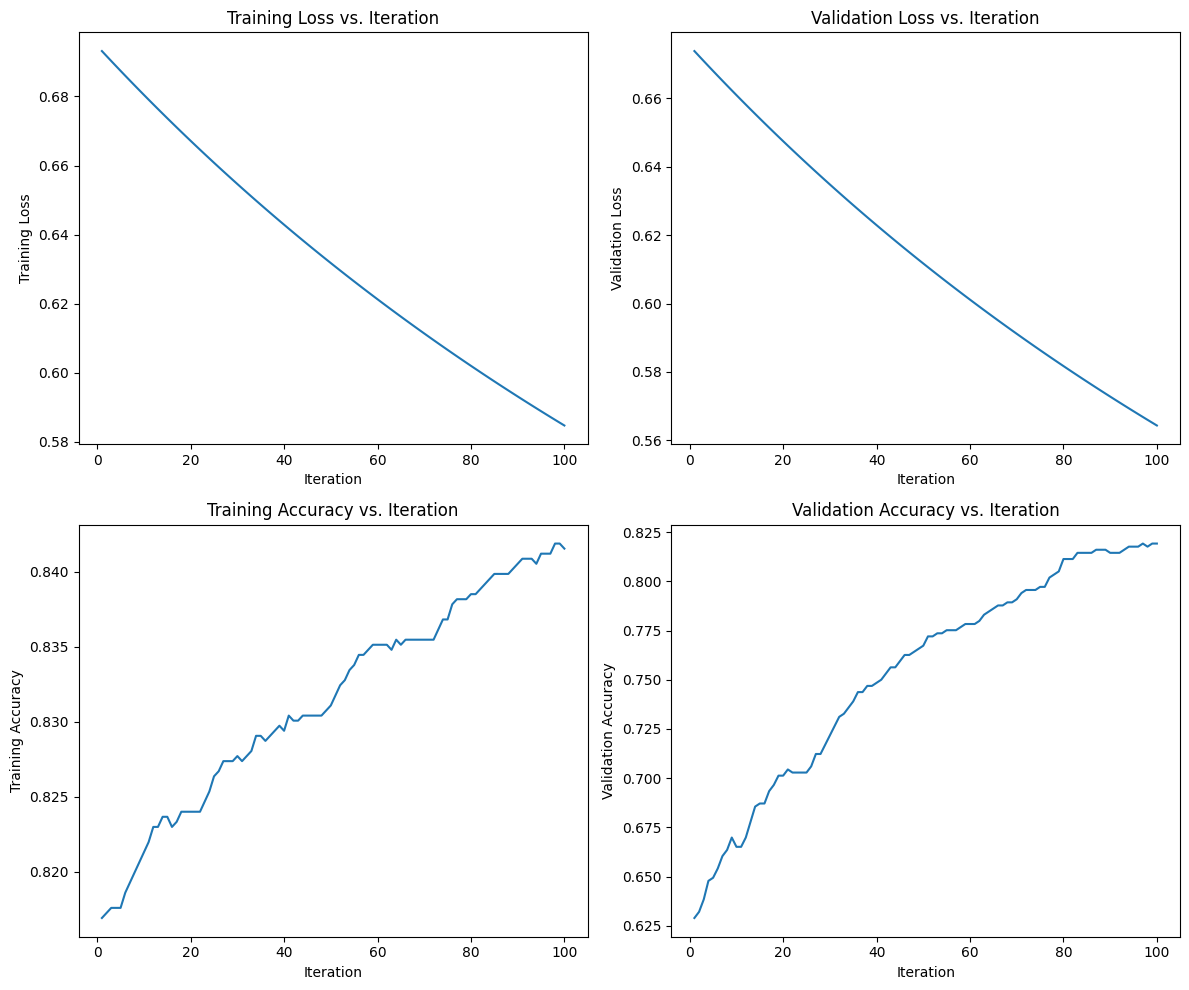

In [191]:
iterations = np.arange(1, numIterations + 1)

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(iterations, loss_train)
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iteration')

plt.subplot(2, 2, 2)
plt.plot(iterations, loss_val)
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Iteration')

plt.subplot(2, 2, 3)
plt.plot(iterations, acc_train)
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Iteration')

plt.subplot(2, 2, 4)
plt.plot(iterations, acc_val)
plt.xlabel('Iteration')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Iteration')

plt.tight_layout()
plt.show()

# **PART B**

In [192]:
path = "/content/drive/MyDrive/ML/ML Assignments/Assignment 1/Heart Disease data.csv"
df = pd.read_csv(path)

In [193]:
# Split the features into dependent and independent

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64'])

In [194]:
# Data Preprocessing

# Handling missing values
numerical_features.fillna(df.mean(), inplace=True)

X[numerical_features.columns] = numerical_features

In [195]:
def minMaxScaler_(X):
  min_ = X.min(axis = 0)
  max_ = X_scaled.max(axis = 0)

  return (X - min_) / (max_ - min_)

In [196]:
# No scaling
X_no_scaling = X

# Min-Max Scaling
X_minmax = minMaxScaler_(X)

In [197]:
X_no_scaling

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,2.0,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1.0,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,3.0,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,3.0,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753


In [198]:
X_minmax

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0.867158,-0.236341,2.978886,0.000000,0.000000,0.000000,0.0,0.000000,0.0,-0.910620,-0.295590,-0.511687,-1.442331,-0.937070,-1.404993
1,0.000000,-0.472683,0.992962,0.000000,0.000000,0.000000,0.0,0.000000,0.0,-1.479757,-0.492651,-0.767531,-1.664423,-1.327516,-1.367020
2,0.867158,-0.540209,0.000000,0.988271,3.894567,0.000000,0.0,0.000000,0.0,-1.428017,-0.578044,-0.744272,-1.236645,-0.806921,-1.139183
3,0.000000,-0.979129,1.985924,0.988271,5.841851,0.000000,0.0,0.671101,0.0,-1.221058,-0.873634,-1.093150,-1.645495,-0.546624,-2.392285
4,0.000000,-0.472683,1.985924,0.988271,4.478752,0.000000,0.0,0.000000,0.0,-1.841935,-0.610887,-0.837306,-0.953983,-1.067218,-1.708775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0.867158,-0.607735,0.000000,0.988271,0.194728,0.000000,0.0,0.671101,0.0,-2.131678,-1.254617,-1.023374,-1.316143,-0.572654,-1.746748
4234,0.867158,-0.641498,1.985924,0.988271,8.373320,0.000000,0.0,0.000000,0.0,-1.034795,-0.564906,-0.744272,-0.526205,-0.546624,-1.063238
4235,0.000000,-0.540209,0.992962,0.988271,3.894567,0.005145,0.0,0.000000,0.0,-1.459061,-0.624024,-0.558204,-0.815176,-1.041189,-1.746748
4236,0.000000,-0.405157,0.000000,0.988271,2.920925,0.000000,0.0,0.000000,0.0,-1.065839,-0.564906,-0.907082,-0.456801,-1.093248,-1.593594


In [199]:
# No Scaling
X_train_no_scale, X_val_no_scale, X_test_no_scale, y_train_no_scale, y_val_no_scale, y_test_no_scale = train_test_split_(X_no_scaling, y, test_size=0.15, val_size=0.15, random_state=42)

In [200]:
# model with no scaling

numIterations = 100
weight_train=np.zeros(X_train_no_scale.shape[1])
weight_val=np.zeros(X_val_no_scale.shape[1])
weight_test=np.zeros(X_test_no_scale.shape[1])
bias = 0

model_no_scaling_train = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weight_train, bias=bias, x_data=X_train_no_scale, y_data=y_train_no_scale)
print("Training...")
loss_no_scaling_train, acc_no_scaling_train, y_pred_no_scaling_train = model_no_scaling_train.trainData()

Training...
Epoch 1/100, Loss: 0.6931, Accuracy: 84.63%
Epoch 2/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 3/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 4/100, Loss: 2.8414, Accuracy: 15.37%
Epoch 5/100, Loss: 29.2294, Accuracy: 84.63%
Epoch 6/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 7/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 8/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 9/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 10/100, Loss: 5.3080, Accuracy: 15.37%
Epoch 11/100, Loss: 29.2294, Accuracy: 84.63%
Epoch 12/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 13/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 14/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 15/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 16/100, Loss: 5.3101, Accuracy: 15.37%
Epoch 17/100, Loss: 29.2294, Accuracy: 84.63%
Epoch 18/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 19/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 20/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 21/100, Loss: 5.3101, Accuracy: 84.63%
Epoch 22/100, Loss: 5.3101, Accuracy: 15.37%
Epoc

In [201]:
model_no_scaling_val = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weight_val, bias=bias, x_data=X_val_no_scale, y_data=y_val_no_scale)
print("Validation...")
loss_no_scaling_val, acc_no_scaling_val, y_pred_no_scaling_val = model_no_scaling_val.trainData()

Validation...
Epoch 1/100, Loss: 0.6931, Accuracy: 85.22%
Epoch 2/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 3/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 4/100, Loss: 3.8177, Accuracy: 14.78%
Epoch 5/100, Loss: 29.4347, Accuracy: 85.22%
Epoch 6/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 7/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 8/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 9/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 10/100, Loss: 5.1048, Accuracy: 14.78%
Epoch 11/100, Loss: 29.4347, Accuracy: 85.22%
Epoch 12/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 13/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 14/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 15/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 16/100, Loss: 5.1048, Accuracy: 14.78%
Epoch 17/100, Loss: 22.1053, Accuracy: 85.22%
Epoch 18/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 19/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 20/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 21/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 22/100, Loss: 5.1048, Accuracy: 85.22%
Ep

In [202]:
model_no_scaling_test = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weight_test, bias=bias, x_data=X_test_no_scale, y_data=y_test_no_scale)
print("Testing...")
loss_no_scaling_test, acc_no_scaling_test, y_pred_no_scaling_test = model_no_scaling_test.trainData()

Testing...
Epoch 1/100, Loss: 0.6931, Accuracy: 85.22%
Epoch 2/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 3/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 4/100, Loss: 4.7117, Accuracy: 14.78%
Epoch 5/100, Loss: 29.4347, Accuracy: 85.22%
Epoch 6/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 7/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 8/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 9/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 10/100, Loss: 5.1048, Accuracy: 14.78%
Epoch 11/100, Loss: 29.4347, Accuracy: 85.22%
Epoch 12/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 13/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 14/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 15/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 16/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 17/100, Loss: 1.0188, Accuracy: 14.78%
Epoch 18/100, Loss: 29.4347, Accuracy: 85.22%
Epoch 19/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 20/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 21/100, Loss: 5.1048, Accuracy: 85.22%
Epoch 22/100, Loss: 5.1048, Accuracy: 85.22%
Epoch

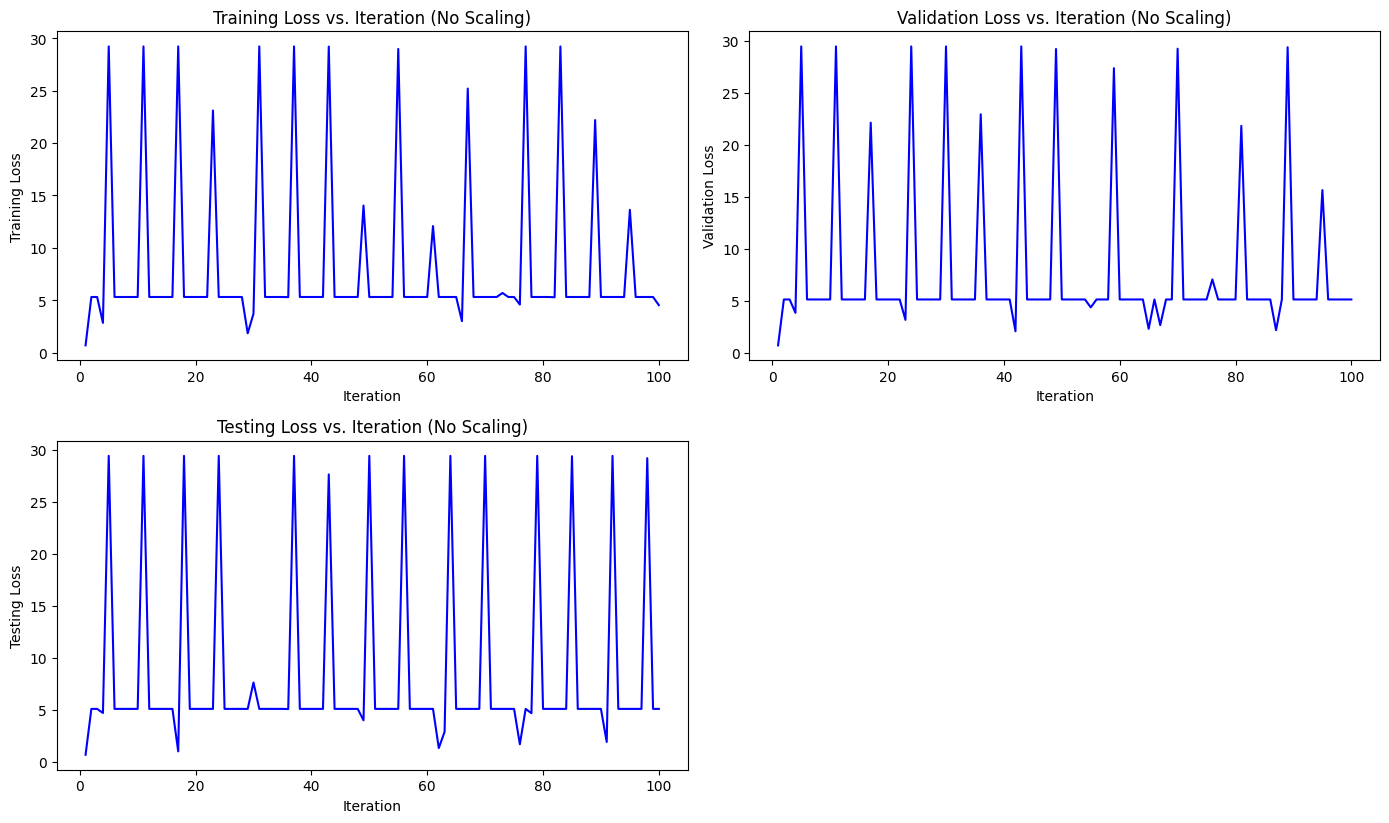

In [203]:
iterations = np.arange(1, numIterations + 1)

plt.figure(figsize=(14, 12))

# Plot Training Loss vs. Iteration for No Scaling
plt.subplot(3, 2, 1)
plt.plot(iterations, loss_no_scaling_train, label='No Scaling', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iteration (No Scaling)')

plt.subplot(3, 2, 2)
plt.plot(iterations, loss_no_scaling_val, label='No Scaling', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Iteration (No Scaling)')

plt.subplot(3, 2, 3)
plt.plot(iterations, loss_no_scaling_test, label='No Scaling', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Testing Loss')
plt.title('Testing Loss vs. Iteration (No Scaling)')

plt.tight_layout()
plt.show()

In [204]:
# MinMax scaling
X_train_minmax, X_val_minmax, X_test_minmax, y_train_minmax, y_val_minmax, y_test_minmax = train_test_split_(X_minmax, y, test_size=0.15, val_size=0.15, random_state=42)

In [205]:
# model with Min-Max scaling

numIterations = 100
weight_train=np.zeros(X_train_minmax.shape[1])
weight_val=np.zeros(X_val_minmax.shape[1])
weight_test=np.zeros(X_test_minmax.shape[1])
bias = 0

model_minmax_train = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weight_train, bias=bias, x_data=X_train_minmax, y_data=y_train_minmax)
print("Training...")
loss_minmax_train, acc_minmax_train, y_pred_minmax_train = model_minmax_train.trainData()

Training...
Epoch 1/100, Loss: 0.6931, Accuracy: 84.63%
Epoch 2/100, Loss: 0.6784, Accuracy: 84.63%
Epoch 3/100, Loss: 0.6648, Accuracy: 84.63%
Epoch 4/100, Loss: 0.6521, Accuracy: 84.63%
Epoch 5/100, Loss: 0.6404, Accuracy: 84.63%
Epoch 6/100, Loss: 0.6296, Accuracy: 84.63%
Epoch 7/100, Loss: 0.6195, Accuracy: 84.63%
Epoch 8/100, Loss: 0.6102, Accuracy: 84.63%
Epoch 9/100, Loss: 0.6015, Accuracy: 84.63%
Epoch 10/100, Loss: 0.5935, Accuracy: 84.63%
Epoch 11/100, Loss: 0.5860, Accuracy: 84.63%
Epoch 12/100, Loss: 0.5791, Accuracy: 84.63%
Epoch 13/100, Loss: 0.5726, Accuracy: 84.63%
Epoch 14/100, Loss: 0.5665, Accuracy: 84.63%
Epoch 15/100, Loss: 0.5609, Accuracy: 84.63%
Epoch 16/100, Loss: 0.5556, Accuracy: 84.63%
Epoch 17/100, Loss: 0.5507, Accuracy: 84.63%
Epoch 18/100, Loss: 0.5461, Accuracy: 84.63%
Epoch 19/100, Loss: 0.5417, Accuracy: 84.63%
Epoch 20/100, Loss: 0.5377, Accuracy: 84.63%
Epoch 21/100, Loss: 0.5339, Accuracy: 84.63%
Epoch 22/100, Loss: 0.5303, Accuracy: 84.63%
Epoch 2

In [206]:
model_minmax_val = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weight_val, bias=bias, x_data=X_val_minmax, y_data=y_val_minmax)
print("Validation...")
loss_minmax_val, acc_minmax_val, y_pred_minmax_val = model_minmax_val.trainData()

Validation...
Epoch 1/100, Loss: 0.6931, Accuracy: 85.22%
Epoch 2/100, Loss: 0.6786, Accuracy: 85.22%
Epoch 3/100, Loss: 0.6650, Accuracy: 85.22%
Epoch 4/100, Loss: 0.6524, Accuracy: 85.22%
Epoch 5/100, Loss: 0.6407, Accuracy: 85.22%
Epoch 6/100, Loss: 0.6298, Accuracy: 85.22%
Epoch 7/100, Loss: 0.6197, Accuracy: 85.22%
Epoch 8/100, Loss: 0.6103, Accuracy: 85.22%
Epoch 9/100, Loss: 0.6015, Accuracy: 85.22%
Epoch 10/100, Loss: 0.5933, Accuracy: 85.22%
Epoch 11/100, Loss: 0.5857, Accuracy: 85.22%
Epoch 12/100, Loss: 0.5785, Accuracy: 85.22%
Epoch 13/100, Loss: 0.5719, Accuracy: 85.22%
Epoch 14/100, Loss: 0.5656, Accuracy: 85.22%
Epoch 15/100, Loss: 0.5598, Accuracy: 85.22%
Epoch 16/100, Loss: 0.5543, Accuracy: 85.22%
Epoch 17/100, Loss: 0.5492, Accuracy: 85.22%
Epoch 18/100, Loss: 0.5444, Accuracy: 85.22%
Epoch 19/100, Loss: 0.5398, Accuracy: 85.22%
Epoch 20/100, Loss: 0.5356, Accuracy: 85.22%
Epoch 21/100, Loss: 0.5316, Accuracy: 85.22%
Epoch 22/100, Loss: 0.5278, Accuracy: 85.22%
Epoch

In [207]:
model_minmax_test = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weight_test, bias=bias, x_data=X_test_minmax, y_data=y_test_minmax)
print("Testing...")
loss_minmax_test, acc_minmax_test, y_pred_minmax_test = model_minmax_test.trainData()

Testing...
Epoch 1/100, Loss: 0.6931, Accuracy: 85.22%
Epoch 2/100, Loss: 0.6783, Accuracy: 85.22%
Epoch 3/100, Loss: 0.6645, Accuracy: 85.22%
Epoch 4/100, Loss: 0.6518, Accuracy: 85.22%
Epoch 5/100, Loss: 0.6399, Accuracy: 85.22%
Epoch 6/100, Loss: 0.6288, Accuracy: 85.22%
Epoch 7/100, Loss: 0.6186, Accuracy: 85.22%
Epoch 8/100, Loss: 0.6090, Accuracy: 85.22%
Epoch 9/100, Loss: 0.6001, Accuracy: 85.22%
Epoch 10/100, Loss: 0.5918, Accuracy: 85.22%
Epoch 11/100, Loss: 0.5840, Accuracy: 85.22%
Epoch 12/100, Loss: 0.5768, Accuracy: 85.22%
Epoch 13/100, Loss: 0.5701, Accuracy: 85.22%
Epoch 14/100, Loss: 0.5638, Accuracy: 85.22%
Epoch 15/100, Loss: 0.5579, Accuracy: 85.22%
Epoch 16/100, Loss: 0.5523, Accuracy: 85.22%
Epoch 17/100, Loss: 0.5472, Accuracy: 85.22%
Epoch 18/100, Loss: 0.5423, Accuracy: 85.22%
Epoch 19/100, Loss: 0.5377, Accuracy: 85.22%
Epoch 20/100, Loss: 0.5335, Accuracy: 85.22%
Epoch 21/100, Loss: 0.5294, Accuracy: 85.22%
Epoch 22/100, Loss: 0.5256, Accuracy: 85.22%
Epoch 23

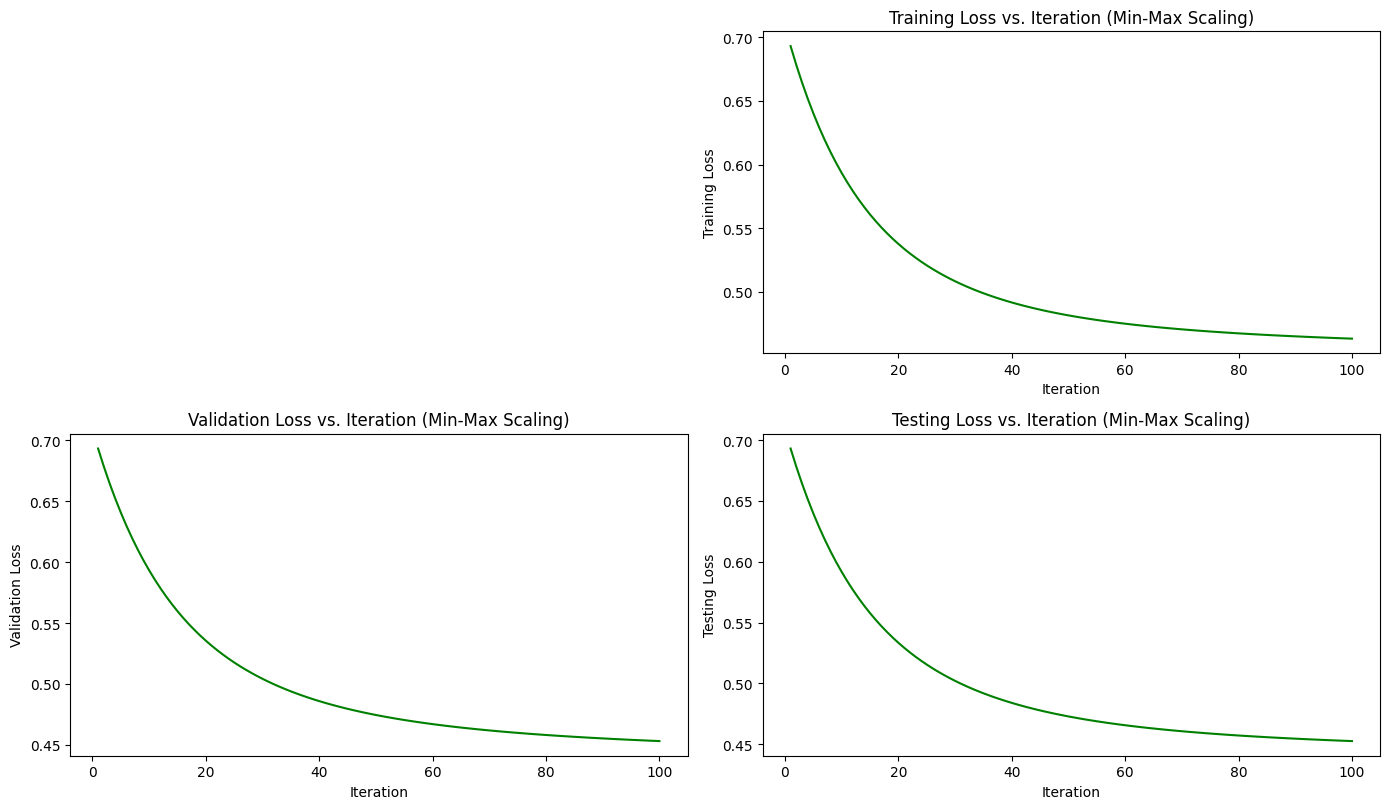

In [208]:
iterations = np.arange(1, numIterations + 1)

plt.figure(figsize=(14, 12))

# Plot Training Loss vs. Iteration for Min-Max Scaling
plt.subplot(3, 2, 4)
plt.plot(iterations, loss_minmax_train, label='Min-Max Scaling', color='green')
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iteration (Min-Max Scaling)')

plt.subplot(3, 2, 5)
plt.plot(iterations, loss_minmax_val, label='Min-Max Scaling', color='green')
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Iteration (Min-Max Scaling)')

plt.subplot(3, 2, 6)
plt.plot(iterations, loss_minmax_test, label='Min-Max Scaling', color='green')
plt.xlabel('Iteration')
plt.ylabel('Testing Loss')
plt.title('Testing Loss vs. Iteration (Min-Max Scaling)')

plt.tight_layout()
plt.show()

# PART **C**

In [209]:
path = "/content/drive/MyDrive/ML/ML Assignments/Assignment 1/Heart Disease data.csv"
df = pd.read_csv(path)

In [210]:
# Split the features into dependent and independent

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64'])

In [211]:
# Data Preprocessing

# Handling missing values
numerical_features.fillna(df.mean(), inplace=True)

X[numerical_features.columns] = numerical_features

In [212]:
# Scaling
X_scaled = scale(X)

In [213]:
# Split dataset into train (70%), validation (15%), test (15%)

X_train, X_val, X_test, y_train, y_val, y_test = train_test_split_(X_scaled, y, test_size=0.15, val_size=0.15, random_state=42)

In [214]:
num_features = X_val.shape[1]
weights = np.zeros(num_features)
bias = 0
numIterations=100

model = LogisticRegressionBGD(learningRate=0.01, numIterations=100, weight=weights, bias=bias, x_data=X_val, y_data=y_val)

# Train the model
loss_val, acc_val, y_pred_val = model.trainData()

Epoch 1/100, Loss: 0.6931, Accuracy: 82.23%
Epoch 2/100, Loss: 0.6914, Accuracy: 82.39%
Epoch 3/100, Loss: 0.6897, Accuracy: 82.39%
Epoch 4/100, Loss: 0.6879, Accuracy: 82.39%
Epoch 5/100, Loss: 0.6862, Accuracy: 82.23%
Epoch 6/100, Loss: 0.6845, Accuracy: 82.23%
Epoch 7/100, Loss: 0.6828, Accuracy: 82.23%
Epoch 8/100, Loss: 0.6812, Accuracy: 82.39%
Epoch 9/100, Loss: 0.6795, Accuracy: 82.55%
Epoch 10/100, Loss: 0.6778, Accuracy: 82.55%
Epoch 11/100, Loss: 0.6762, Accuracy: 82.55%
Epoch 12/100, Loss: 0.6746, Accuracy: 82.39%
Epoch 13/100, Loss: 0.6730, Accuracy: 82.39%
Epoch 14/100, Loss: 0.6714, Accuracy: 82.39%
Epoch 15/100, Loss: 0.6698, Accuracy: 82.39%
Epoch 16/100, Loss: 0.6682, Accuracy: 82.39%
Epoch 17/100, Loss: 0.6667, Accuracy: 82.39%
Epoch 18/100, Loss: 0.6651, Accuracy: 82.55%
Epoch 19/100, Loss: 0.6636, Accuracy: 82.55%
Epoch 20/100, Loss: 0.6621, Accuracy: 82.55%
Epoch 21/100, Loss: 0.6606, Accuracy: 82.39%
Epoch 22/100, Loss: 0.6591, Accuracy: 82.39%
Epoch 23/100, Loss:

In [215]:
y_pred_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [216]:
cf, tp, tn, fp, fn = model.confusion_matrix(y_pred_val)

In [217]:
cf

array([[ 29.,  43.],
       [ 65., 499.]])

In [218]:
accuracy, precision, recall, f1_score = model.metrics(tp, tn, fp, fn)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1_score: {f1_score}")

Accuracy: 0.8301886792452831
Precision: 0.4027777777777778
Recall: 0.30851063829787234
f1_score: 0.3493975903614458


# **PART D**

In [219]:
# Stochastic Gradient Descent
weights_train = np.zeros(X_train.shape[1])
weights_val = np.zeros(X_val.shape[1])
weights_test = np.zeros(X_test.shape[1])
bias = 0
numIterations=100

model_train = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weights_train, bias=bias, x_data=X_train, y_data=y_train)
model_val = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weights_val, bias=bias, x_data=X_val, y_data=y_val)
model_test = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weights_test, bias=bias, x_data=X_test, y_data=y_test)

# Train the model
print("Training...")
loss_sgd_train, accuracy_sgd_train, y_pred_sgd_train = model_train.trainData(method='sgd')

print("Validation...")
loss_sgd_val, accuracy_sgd_val, y_pred_sgd_val = model_val.trainData(method='sgd')

print("Testing...")
loss_sgd_test, accuracy_sgd_test, y_pred_sgd_test = model_test.trainData(method='sgd')

Training...
Epoch 1/100, Loss: 0.3851, Accuracy: 85.13%
Epoch 2/100, Loss: 0.3848, Accuracy: 85.10%
Epoch 3/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 4/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 5/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 6/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 7/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 8/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 9/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 10/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 11/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 12/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 13/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 14/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 15/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 16/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 17/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 18/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 19/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 20/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 21/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 22/100, Loss: 0.3849, Accuracy: 85.10%
Epoch 2

In [220]:
# Mini-Batch Gradient Descent 2
weights_train = np.zeros(X_train.shape[1])
weights_val = np.zeros(X_val.shape[1])
weights_test = np.zeros(X_test.shape[1])
bias = 0
numIterations=100

model_train = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weights_train, bias=bias, x_data=X_train, y_data=y_train)
model_val = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weights_val, bias=bias, x_data=X_val, y_data=y_val)
model_test = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weights_test, bias=bias, x_data=X_test, y_data=y_test)

# Train the model
print("Training...")
loss_mb2_train, accuracy_mb2_train, y_pred_mb2_train = model_train.trainData(method='mini_batch', batch_size=2)

print("Validation...")
loss_mb2_val, accuracy_mb2_val, y_pred_mb2_val = model_val.trainData(method='mini_batch', batch_size=2)

print("Testing...")
loss_mb2_test, accuracy_mb2_test, y_pred_mb2_test = model_test.trainData(method='mini_batch', batch_size=2)

Training...
Epoch 1/100, Loss: 0.3885, Accuracy: 85.13%
Epoch 2/100, Loss: 0.3831, Accuracy: 85.33%
Epoch 3/100, Loss: 0.3825, Accuracy: 85.33%
Epoch 4/100, Loss: 0.3829, Accuracy: 85.30%
Epoch 5/100, Loss: 0.3831, Accuracy: 84.96%
Epoch 6/100, Loss: 0.3824, Accuracy: 85.33%
Epoch 7/100, Loss: 0.3834, Accuracy: 85.06%
Epoch 8/100, Loss: 0.3821, Accuracy: 85.20%
Epoch 9/100, Loss: 0.3821, Accuracy: 85.33%
Epoch 10/100, Loss: 0.3819, Accuracy: 85.30%
Epoch 11/100, Loss: 0.3821, Accuracy: 85.30%
Epoch 12/100, Loss: 0.3822, Accuracy: 85.30%
Epoch 13/100, Loss: 0.3821, Accuracy: 85.17%
Epoch 14/100, Loss: 0.3821, Accuracy: 85.23%
Epoch 15/100, Loss: 0.3828, Accuracy: 85.23%
Epoch 16/100, Loss: 0.3830, Accuracy: 85.37%
Epoch 17/100, Loss: 0.3827, Accuracy: 85.06%
Epoch 18/100, Loss: 0.3824, Accuracy: 85.13%
Epoch 19/100, Loss: 0.3834, Accuracy: 85.30%
Epoch 20/100, Loss: 0.3822, Accuracy: 85.23%
Epoch 21/100, Loss: 0.3832, Accuracy: 85.06%
Epoch 22/100, Loss: 0.3825, Accuracy: 85.23%
Epoch 2

In [221]:
# Mini-Batch Gradient Descent 4
weights_train = np.zeros(X_train.shape[1])
weights_val = np.zeros(X_val.shape[1])
weights_test = np.zeros(X_test.shape[1])
bias = 0
numIterations=100

model_train = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weights_train, bias=bias, x_data=X_train, y_data=y_train)
model_val = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weights_val, bias=bias, x_data=X_val, y_data=y_val)
model_test = LogisticRegressionBGD(learningRate=0.01, numIterations=numIterations, weight=weights_test, bias=bias, x_data=X_test, y_data=y_test)

# Train the model
print("Training...")
loss_mb4_train, accuracy_mb4_train, y_pred_mb4_train = model_train.trainData(method='mini_batch', batch_size=4)

print("Validation...")
loss_mb4_val, accuracy_mb4_val, y_pred_mb4_val = model_val.trainData(method='mini_batch', batch_size=4)

print("Test...")
loss_mb4_test, accuracy_mb4_test, y_pred_mb4_test = model_test.trainData(method='mini_batch', batch_size=4)

Training...
Epoch 1/100, Loss: 0.4102, Accuracy: 84.93%
Epoch 2/100, Loss: 0.3878, Accuracy: 85.13%
Epoch 3/100, Loss: 0.3837, Accuracy: 85.27%
Epoch 4/100, Loss: 0.3827, Accuracy: 85.20%
Epoch 5/100, Loss: 0.3823, Accuracy: 85.03%
Epoch 6/100, Loss: 0.3820, Accuracy: 85.23%
Epoch 7/100, Loss: 0.3825, Accuracy: 85.13%
Epoch 8/100, Loss: 0.3822, Accuracy: 85.20%
Epoch 9/100, Loss: 0.3821, Accuracy: 85.23%
Epoch 10/100, Loss: 0.3822, Accuracy: 85.20%
Epoch 11/100, Loss: 0.3820, Accuracy: 85.13%
Epoch 12/100, Loss: 0.3823, Accuracy: 85.30%
Epoch 13/100, Loss: 0.3818, Accuracy: 85.33%
Epoch 14/100, Loss: 0.3820, Accuracy: 85.20%
Epoch 15/100, Loss: 0.3818, Accuracy: 85.37%
Epoch 16/100, Loss: 0.3820, Accuracy: 85.20%
Epoch 17/100, Loss: 0.3819, Accuracy: 85.27%
Epoch 18/100, Loss: 0.3819, Accuracy: 85.30%
Epoch 19/100, Loss: 0.3818, Accuracy: 85.30%
Epoch 20/100, Loss: 0.3818, Accuracy: 85.37%
Epoch 21/100, Loss: 0.3820, Accuracy: 85.33%
Epoch 22/100, Loss: 0.3818, Accuracy: 85.23%
Epoch 2

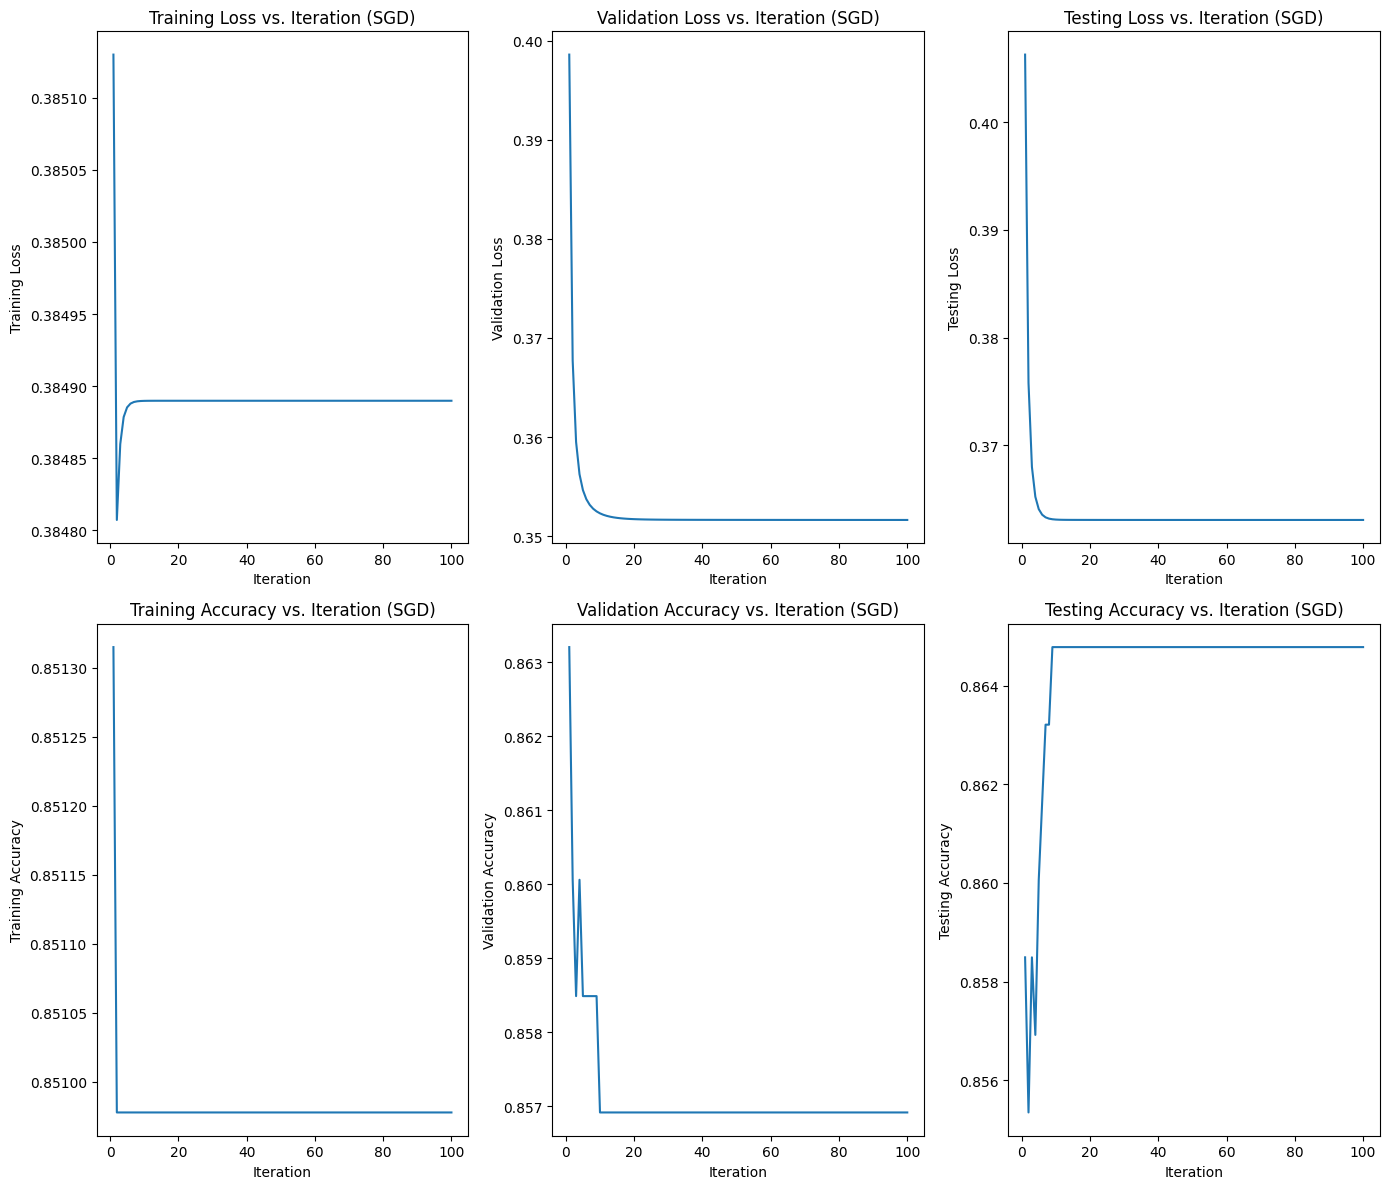

In [222]:
iterations = np.arange(1, numIterations + 1)

plt.figure(figsize=(14, 12))

# Training, val, test losses sgd
plt.subplot(2, 3, 1)
plt.plot(iterations, loss_sgd_train)
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iteration (SGD)')

plt.subplot(2, 3, 2)
plt.plot(iterations, loss_sgd_val)
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Iteration (SGD)')

plt.subplot(2, 3, 3)
plt.plot(iterations, loss_sgd_test)
plt.xlabel('Iteration')
plt.ylabel('Testing Loss')
plt.title('Testing Loss vs. Iteration (SGD)')

# Training, val, test accuracies sgd
plt.subplot(2, 3, 4)
plt.plot(iterations, accuracy_sgd_train)
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Iteration (SGD)')

plt.subplot(2, 3, 5)
plt.plot(iterations, accuracy_sgd_val)
plt.xlabel('Iteration')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Iteration (SGD)')

plt.subplot(2, 3, 6)
plt.plot(iterations, accuracy_sgd_test)
plt.xlabel('Iteration')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs. Iteration (SGD)')

plt.tight_layout()
plt.show()

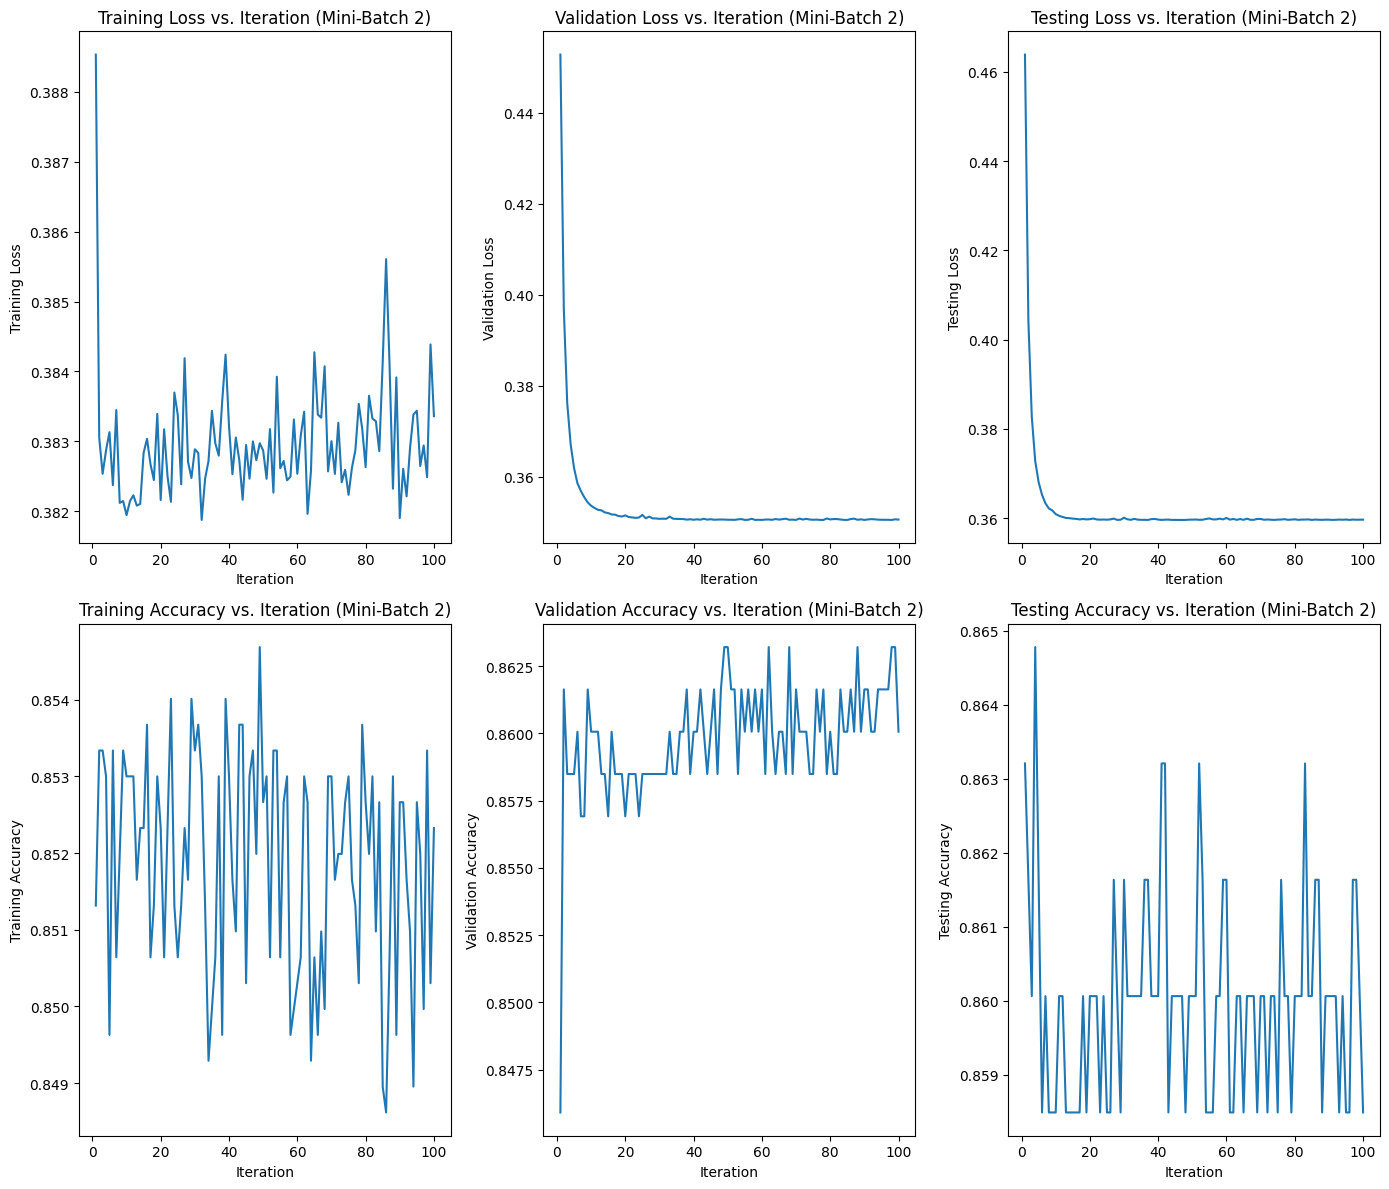

In [223]:
iterations = np.arange(1, numIterations + 1)

plt.figure(figsize=(14, 12))

# Training, val, test losses bm 2
plt.subplot(2, 3, 1)
plt.plot(iterations, loss_mb2_train)
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iteration (Mini-Batch 2)')

plt.subplot(2, 3, 2)
plt.plot(iterations, loss_mb2_val)
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Iteration (Mini-Batch 2)')

plt.subplot(2, 3, 3)
plt.plot(iterations, loss_mb2_test)
plt.xlabel('Iteration')
plt.ylabel('Testing Loss')
plt.title('Testing Loss vs. Iteration (Mini-Batch 2)')

# Training, val, test accuracies sgd
plt.subplot(2, 3, 4)
plt.plot(iterations, accuracy_mb2_train)
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Iteration (Mini-Batch 2)')

plt.subplot(2, 3, 5)
plt.plot(iterations, accuracy_mb2_val)
plt.xlabel('Iteration')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Iteration (Mini-Batch 2)')

plt.subplot(2, 3, 6)
plt.plot(iterations, accuracy_mb2_test)
plt.xlabel('Iteration')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs. Iteration (Mini-Batch 2)')

plt.tight_layout()
plt.show()

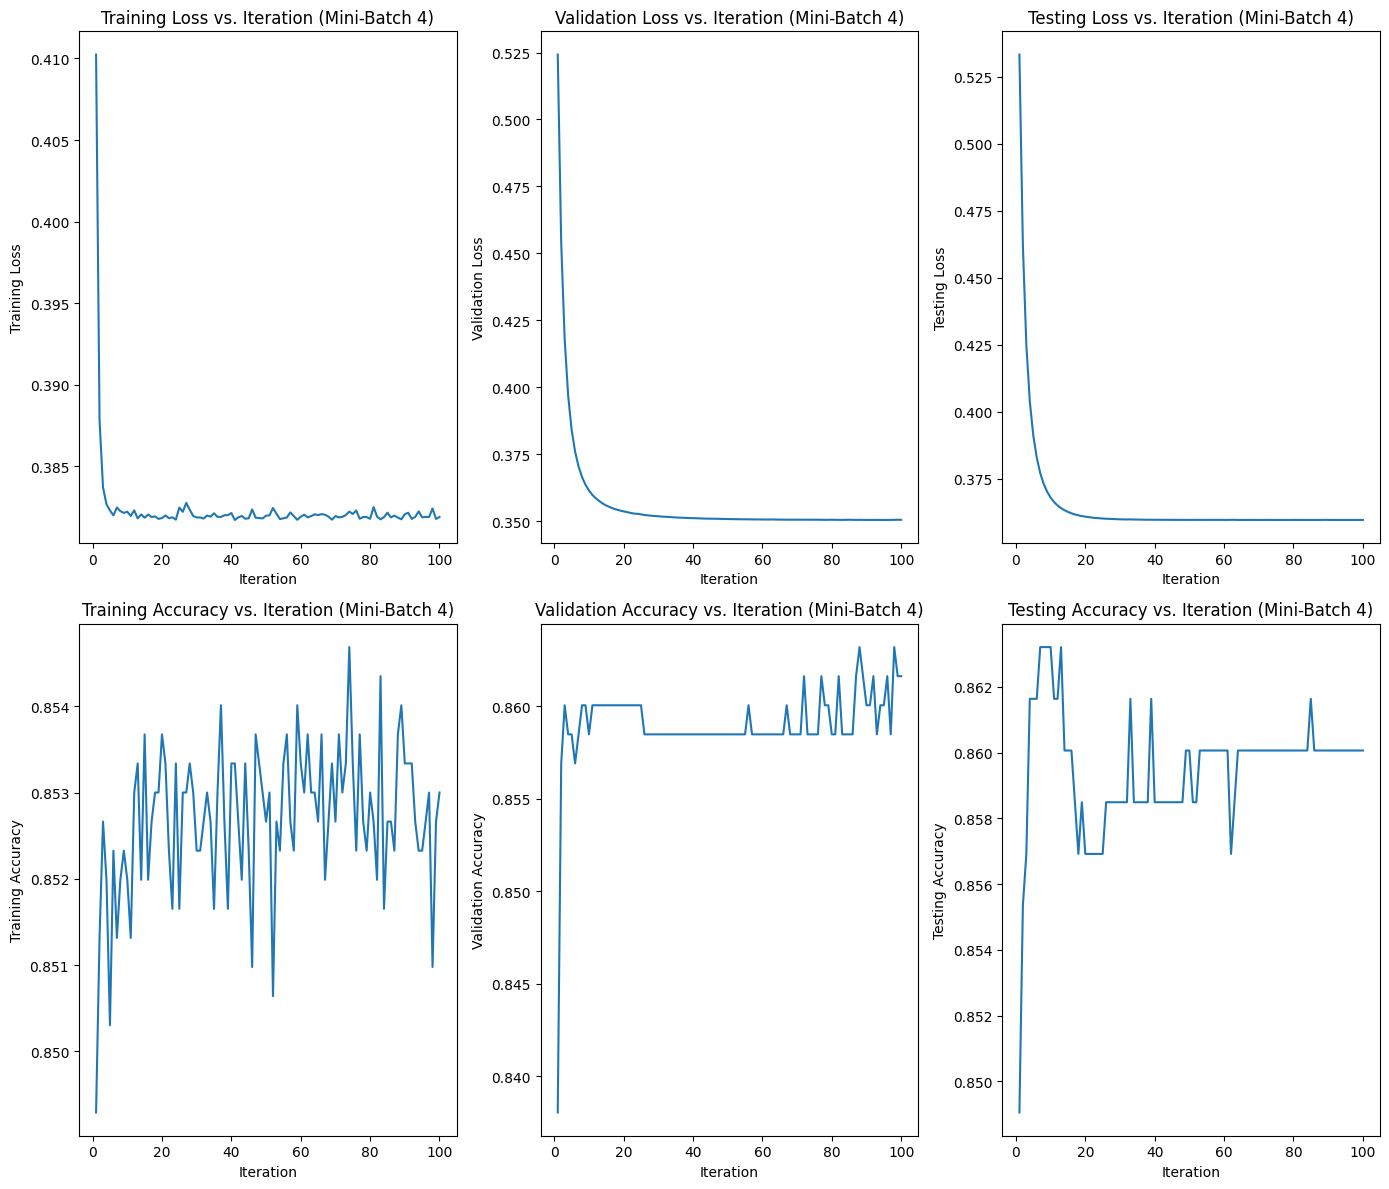

In [224]:
iterations = np.arange(1, numIterations + 1)

plt.figure(figsize=(14, 12))

# Training, val, test losses bm 2
plt.subplot(2, 3, 1)
plt.plot(iterations, loss_mb4_train)
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Iteration (Mini-Batch 4)')

plt.subplot(2, 3, 2)
plt.plot(iterations, loss_mb4_val)
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Iteration (Mini-Batch 4)')

plt.subplot(2, 3, 3)
plt.plot(iterations, loss_mb4_test)
plt.xlabel('Iteration')
plt.ylabel('Testing Loss')
plt.title('Testing Loss vs. Iteration (Mini-Batch 4)')

# Training, val, test accuracies sgd
plt.subplot(2, 3, 4)
plt.plot(iterations, accuracy_mb4_train)
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Iteration (Mini-Batch 4)')

plt.subplot(2, 3, 5)
plt.plot(iterations, accuracy_mb4_val)
plt.xlabel('Iteration')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Iteration (Mini-Batch 4)')

plt.subplot(2, 3, 6)
plt.plot(iterations, accuracy_mb4_test)
plt.xlabel('Iteration')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs. Iteration (Mini-Batch 4)')

plt.tight_layout()
plt.show()

# **PART E**

In [225]:
num_features = X_train.shape[1]
weights = np.zeros(num_features)
bias = 0
numIterations=100

model = LogisticRegressionBGD(learningRate=0.01, numIterations=100, weight=weights, bias=bias, x_data=X_val, y_data=y_val)

# Train the model
loss_val, acc_val, y_pred = model.trainData()

Epoch 1/100, Loss: 0.6931, Accuracy: 82.23%
Epoch 2/100, Loss: 0.6914, Accuracy: 82.39%
Epoch 3/100, Loss: 0.6897, Accuracy: 82.39%
Epoch 4/100, Loss: 0.6879, Accuracy: 82.39%
Epoch 5/100, Loss: 0.6862, Accuracy: 82.23%
Epoch 6/100, Loss: 0.6845, Accuracy: 82.23%
Epoch 7/100, Loss: 0.6828, Accuracy: 82.23%
Epoch 8/100, Loss: 0.6812, Accuracy: 82.39%
Epoch 9/100, Loss: 0.6795, Accuracy: 82.55%
Epoch 10/100, Loss: 0.6778, Accuracy: 82.55%
Epoch 11/100, Loss: 0.6762, Accuracy: 82.55%
Epoch 12/100, Loss: 0.6746, Accuracy: 82.39%
Epoch 13/100, Loss: 0.6730, Accuracy: 82.39%
Epoch 14/100, Loss: 0.6714, Accuracy: 82.39%
Epoch 15/100, Loss: 0.6698, Accuracy: 82.39%
Epoch 16/100, Loss: 0.6682, Accuracy: 82.39%
Epoch 17/100, Loss: 0.6667, Accuracy: 82.39%
Epoch 18/100, Loss: 0.6651, Accuracy: 82.55%
Epoch 19/100, Loss: 0.6636, Accuracy: 82.55%
Epoch 20/100, Loss: 0.6621, Accuracy: 82.55%
Epoch 21/100, Loss: 0.6606, Accuracy: 82.39%
Epoch 22/100, Loss: 0.6591, Accuracy: 82.39%
Epoch 23/100, Loss:

In [226]:
folds = 5
fold_indices = model.kfold_Indices(folds)

In [227]:
X_val = X_val if isinstance(X_val, np.ndarray) else X_val.to_numpy()
y_val = y_val if isinstance(y_val, np.ndarray) else y_val.to_numpy()

num_features = X_train.shape[1]
weights = np.zeros(num_features)
bias = 0
numIterations=100
metrics = []
i = 1

for val_indices in fold_indices:
    X_val_fold = X_val[val_indices]
    y_val_fold = y_val[val_indices]

    # Initialize and train your model
    model = LogisticRegressionBGD(learningRate=0.01, numIterations=100, weight=weights, bias=bias, x_data=X_val_fold, y_data=y_val_fold)
    print(f"K = {i}")
    loss_val, acc_val, y_pred = model.trainData(method='batch')
    matrix, tp, tn, fp, fn = model.confusion_matrix(y_pred)
    metrics.append((tp, tn, fp, fn))
    i += 1

K = 1
Epoch 1/100, Loss: 0.6931, Accuracy: 80.31%
Epoch 2/100, Loss: 0.6909, Accuracy: 80.31%
Epoch 3/100, Loss: 0.6886, Accuracy: 80.31%
Epoch 4/100, Loss: 0.6864, Accuracy: 79.53%
Epoch 5/100, Loss: 0.6841, Accuracy: 79.53%
Epoch 6/100, Loss: 0.6820, Accuracy: 79.53%
Epoch 7/100, Loss: 0.6798, Accuracy: 79.53%
Epoch 8/100, Loss: 0.6776, Accuracy: 79.53%
Epoch 9/100, Loss: 0.6755, Accuracy: 79.53%
Epoch 10/100, Loss: 0.6734, Accuracy: 79.53%
Epoch 11/100, Loss: 0.6713, Accuracy: 79.53%
Epoch 12/100, Loss: 0.6693, Accuracy: 79.53%
Epoch 13/100, Loss: 0.6672, Accuracy: 79.53%
Epoch 14/100, Loss: 0.6652, Accuracy: 79.53%
Epoch 15/100, Loss: 0.6632, Accuracy: 80.31%
Epoch 16/100, Loss: 0.6612, Accuracy: 80.31%
Epoch 17/100, Loss: 0.6593, Accuracy: 80.31%
Epoch 18/100, Loss: 0.6574, Accuracy: 80.31%
Epoch 19/100, Loss: 0.6554, Accuracy: 80.31%
Epoch 20/100, Loss: 0.6535, Accuracy: 80.31%
Epoch 21/100, Loss: 0.6517, Accuracy: 80.31%
Epoch 22/100, Loss: 0.6498, Accuracy: 81.10%
Epoch 23/100,

In [228]:
metrics

[(8, 100, 9, 10),
 (10, 88, 17, 12),
 (9, 95, 16, 7),
 (11, 89, 22, 5),
 (13, 82, 23, 9)]

In [229]:
def mean(arr):
    return sum(arr) / len(arr)

def std_dev(arr):
    avg = mean(arr)
    variance = sum((x - avg) ** 2 for x in arr) / len(arr)
    return variance ** 0.5

In [230]:
accuracies = []
precisions = []
recalls = []
f1_scores = []

for tp, tn, fp, fn in metrics:
    acc, prec, rec, f1 = model.metrics(tp, tn, fp, fn)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

acc_mean = mean(accuracies)
acc_std = std_dev(accuracies)

prec_mean = mean(precisions)
prec_std = std_dev(precisions)

rec_mean = mean(recalls)
rec_std = std_dev(recalls)

f1_mean = mean(f1_scores)
f1_std = std_dev(f1_scores)

print(f"Accuracy: Mean = {acc_mean}, Std = {acc_std}")
print(f"Precision: Mean = {prec_mean}, Std = {prec_std}")
print(f"Recall: Mean = {rec_mean}, Std = {rec_std}")
print(f"F1 Score: Mean = {f1_mean}, Std = {f1_std}")

Accuracy: Mean = 0.7952755905511811, Std = 0.03591103701099649
Precision: Mean = 0.37908061002178645, Std = 0.04739050464403314
Recall: Mean = 0.5479797979797979, Std = 0.09051982456298951
F1 Score: Mean = 0.4403171933197164, Std = 0.017070600141257355


# **PART F**

In [231]:
num_features = X_val.shape[1]
weights = np.zeros(num_features)
bias = 0
numIterations=100

model_l1_01 = LogisticRegressionBGD(learningRate=0.01, numIterations=100, weight=weights, bias=bias, x_data=X_val, y_data=y_val, regularization='L1', reg_lambda=0.01)
model_l1_04 = LogisticRegressionBGD(learningRate=0.01, numIterations=100, weight=weights, bias=bias, x_data=X_val, y_data=y_val, regularization='L1', reg_lambda=0.04)
model_l2_01 = LogisticRegressionBGD(learningRate=0.01, numIterations=100, weight=weights, bias=bias, x_data=X_val, y_data=y_val, regularization='L2', reg_lambda=0.01)
model_l2_04 = LogisticRegressionBGD(learningRate=0.01, numIterations=100, weight=weights, bias=bias, x_data=X_val, y_data=y_val, regularization='L1', reg_lambda=0.04)

In [232]:
loss_val_test_l1_false, acc_val_test_l1_false, y_pred_test_l1_false = model_l1_01.trainData(method='sgd', early_stopping=False)

Epoch 1/100, Loss: 0.4147, Accuracy: 85.85%
Epoch 2/100, Loss: 0.3876, Accuracy: 85.85%
Epoch 3/100, Loss: 0.3814, Accuracy: 85.85%
Epoch 4/100, Loss: 0.3795, Accuracy: 85.85%
Epoch 5/100, Loss: 0.3789, Accuracy: 86.01%
Epoch 6/100, Loss: 0.3786, Accuracy: 86.01%
Epoch 7/100, Loss: 0.3785, Accuracy: 86.01%
Epoch 8/100, Loss: 0.3785, Accuracy: 85.85%
Epoch 9/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 10/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 11/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 12/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 13/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 14/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 15/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 16/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 17/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 18/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 19/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 20/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 21/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 22/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 23/100, Loss:

In [233]:
loss_val_test_l1_false_04, acc_val_test_l1_false_04, y_pred_test_l1_false_04 = model_l1_01.trainData(method='sgd', early_stopping=False)

Epoch 1/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 2/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 3/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 4/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 5/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 6/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 7/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 8/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 9/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 10/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 11/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 12/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 13/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 14/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 15/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 16/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 17/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 18/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 19/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 20/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 21/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 22/100, Loss: 0.3784, Accuracy: 85.85%
Epoch 23/100, Loss:

In [234]:
loss_val_test_l1_true, acc_val_test_l1_true, y_pred_test_l1_true = model_l2_01.trainData(method='sgd', early_stopping=True, patience=10, tol=1e-4)

Epoch 1/100, Loss: 0.3975, Accuracy: 86.16%
Improvement detected at iteration 1, best_loss updated to 0.3975
Epoch 2/100, Loss: 0.3705, Accuracy: 85.85%
Improvement detected at iteration 2, best_loss updated to 0.3705
Epoch 3/100, Loss: 0.3647, Accuracy: 85.85%
Improvement detected at iteration 3, best_loss updated to 0.3647
Epoch 4/100, Loss: 0.3630, Accuracy: 85.85%
Improvement detected at iteration 4, best_loss updated to 0.3630
Epoch 5/100, Loss: 0.3624, Accuracy: 85.85%
Improvement detected at iteration 5, best_loss updated to 0.3624
Epoch 6/100, Loss: 0.3622, Accuracy: 85.85%
Improvement detected at iteration 6, best_loss updated to 0.3622
Epoch 7/100, Loss: 0.3621, Accuracy: 85.85%
No improvement at iteration 7, patience counter: 1/10
Epoch 8/100, Loss: 0.3621, Accuracy: 85.85%
Improvement detected at iteration 8, best_loss updated to 0.3621
Epoch 9/100, Loss: 0.3620, Accuracy: 85.85%
No improvement at iteration 9, patience counter: 1/10
Epoch 10/100, Loss: 0.3620, Accuracy: 85.

In [235]:
loss_val_test_l1_true_04, acc_val_test_l1_true_04, y_pred_test_l1_true_04 = model_l2_04.trainData(method='sgd', early_stopping=True, patience=10, tol=1e-4)

Epoch 1/100, Loss: 0.4425, Accuracy: 86.16%
Improvement detected at iteration 1, best_loss updated to 0.4425
Epoch 2/100, Loss: 0.4164, Accuracy: 85.22%
Improvement detected at iteration 2, best_loss updated to 0.4164
Epoch 3/100, Loss: 0.4125, Accuracy: 85.22%
Improvement detected at iteration 3, best_loss updated to 0.4125
Epoch 4/100, Loss: 0.4116, Accuracy: 85.22%
Improvement detected at iteration 4, best_loss updated to 0.4116
Epoch 5/100, Loss: 0.4114, Accuracy: 85.22%
Improvement detected at iteration 5, best_loss updated to 0.4114
Epoch 6/100, Loss: 0.4113, Accuracy: 85.22%
No improvement at iteration 6, patience counter: 1/10
Epoch 7/100, Loss: 0.4113, Accuracy: 85.22%
No improvement at iteration 7, patience counter: 2/10
Epoch 8/100, Loss: 0.4113, Accuracy: 85.22%
No improvement at iteration 8, patience counter: 3/10
Epoch 9/100, Loss: 0.4112, Accuracy: 85.22%
Improvement detected at iteration 9, best_loss updated to 0.4112
Epoch 10/100, Loss: 0.4112, Accuracy: 85.22%
No impr

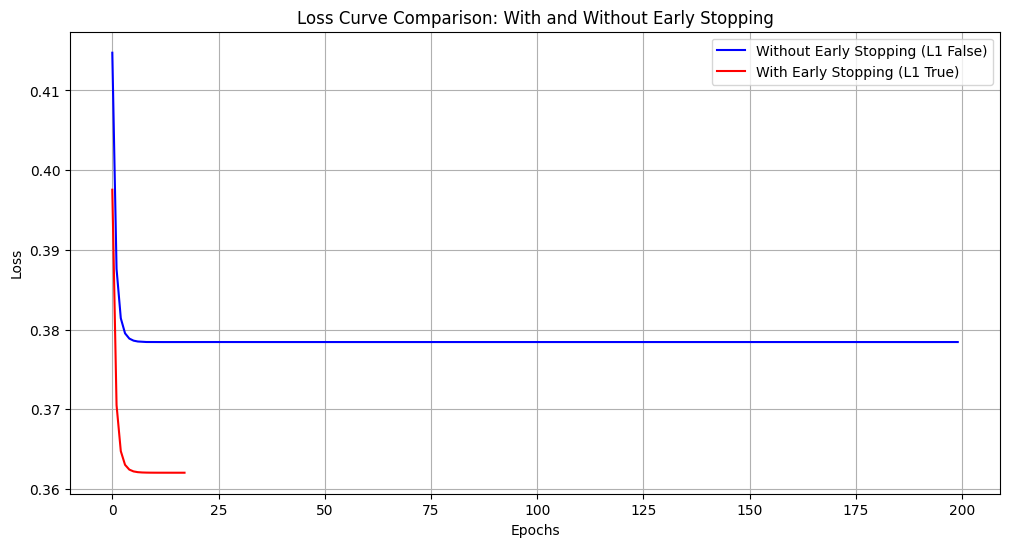

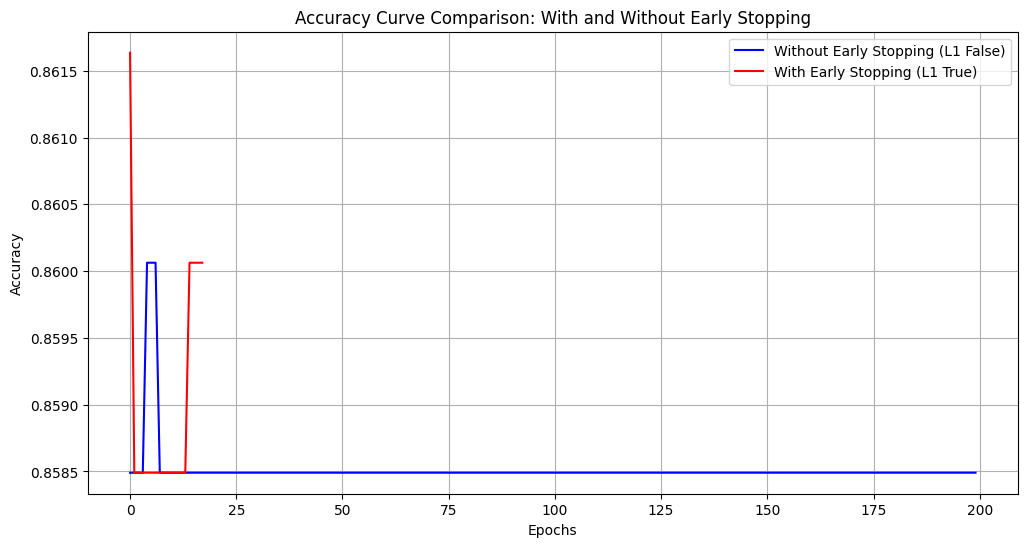

In [236]:
plt.figure(figsize=(12, 6))

# Plotting loss for model without early stopping (L1 False)
plt.plot(loss_val_test_l1_false_04, label="Without Early Stopping (L1 False)", color='blue')

# Plotting loss for model with early stopping (L1 True)
plt.plot(loss_val_test_l1_true, label="With Early Stopping (L1 True)", color='red')

plt.title("Loss Curve Comparison: With and Without Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot the accuracy values for models with and without early stopping
plt.figure(figsize=(12, 6))

# Plotting accuracy for model without early stopping (L1 False)
plt.plot(acc_val_test_l1_false_04, label="Without Early Stopping (L1 False)", color='blue')

# Plotting accuracy for model with early stopping (L1 True)
plt.plot(acc_val_test_l1_true, label="With Early Stopping (L1 True)", color='red')

plt.title("Accuracy Curve Comparison: With and Without Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
